# Classificação de sentimentos

Por favor desenvolva um exercício de classificação com a seguinte base de tweets, utilize unicamente a base de teste.csv como teste para padronizar resultados. Vamos colocar os resultados parciais no mural, e compartilhando informações e notebooks pelo mural. link kaggle da base de dados https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

## Carregar e analisar os dados

In [1]:
import pandas as pd
corona_train = pd.read_csv('Corona_NLP_train.csv', encoding="ISO-8859-1")
corona_test = pd.read_csv('Corona_NLP_test.csv')

In [2]:
df = pd.concat([corona_train,corona_test])

In [3]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
data = df[['OriginalTweet','Sentiment']]

In [5]:
# total de twitters
len(data)

44955

In [6]:
#verificar se há nulls nos dados
print(data.isnull().sum())

OriginalTweet    0
Sentiment        0
dtype: int64


In [7]:
data.Sentiment.value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

In [8]:
# Percentural
data.Sentiment.value_counts(normalize=True) #normalizar para porcentagem.

Positive              0.275142
Negative              0.243755
Neutral               0.185341
Extremely Positive    0.160672
Extremely Negative    0.135091
Name: Sentiment, dtype: float64

In [9]:
# Isso nos diz que houve 2440 twitters com 255 caracteres
data.OriginalTweet.map(len).value_counts().head()

255    2440
280     511
279     476
278     422
277     370
Name: OriginalTweet, dtype: int64

In [10]:
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Pré-processamento

### Limpeza de Dados

In [11]:
# Etapas de pré-processamento de texto - remover hiperlinks, remova números, letras maiúsculas e pontuação
import re
import string

remove_mentions = lambda x: re.sub(r"@[A-Za-z0-9_]+", "", x) # remove @
remove_hashtag = lambda x: re.sub(r"#[A-Za-z0-9_]+", "", x) # remove #
remove_url = lambda x: re.sub(r"\w+:\/\/\S+", " ", x) # remove urls
lower_alpha = lambda x: re.sub(r"\w*\d\w*", " ", x.lower()) # remove todas as palavras com números e também torna todas as palavras em minúsculas
#punc_re = lambda x: re.sub("[%s]" % re.escape(string.punctuation), " ", x) # remove pontuação
remove_non_alpha = lambda x: re.sub(r"[^0-9A-Za-z \t]", "", x) #remove caracteres náo alfanuméricos

data = data.copy()
data.loc[:,'ModifyTweet'] = data.OriginalTweet.map(remove_mentions).map(remove_hashtag).map(remove_url).map(lower_alpha).map(remove_non_alpha)

In [12]:
data.head()

,OriginalTweet,Sentiment,ModifyTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...


In [13]:
data.OriginalTweet.iloc[4]

"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [14]:
data.ModifyTweet.iloc[4]

'me ready to go at supermarket during the  outbreaknot because im paranoid but because my food stock is litteraly empty the  is a serious thing but please dont panic it causes shortage     '

In [15]:
arranjar = lambda x: ' '.join(x.split())

In [16]:
data['ModifyTweet_2'] = data.ModifyTweet.map(arranjar)

In [17]:
data.ModifyTweet_2.iloc[4]

'me ready to go at supermarket during the outbreaknot because im paranoid but because my food stock is litteraly empty the is a serious thing but please dont panic it causes shortage'

## Tokenizar

In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

data['tokens'] = data.ModifyTweet_2.map(word_tokenize)
data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/LeonardoLins/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,OriginalTweet,Sentiment,ModifyTweet,ModifyTweet_2,tokens
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,and and,"[and, and]"
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,..."
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,me ready to go at supermarket during the outbr...,"[me, ready, to, go, at, supermarket, during, t..."


## Stopwords

In [19]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('english')

stop_lambda = lambda x: [y for y in x if y not in stop_words] #todos que estão na stopword saem, os que não estão fica.
data['tokens_stop'] = data.tokens.apply(stop_lambda)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LeonardoLins/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,OriginalTweet,Sentiment,ModifyTweet,ModifyTweet_2,tokens,tokens_stop
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,and and,"[and, and]",[]
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld..."
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, emptyplease, dont, panic, e..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,me ready to go at supermarket during the outbr...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, outbreaknot, im, para..."


## Speech tagging

In [20]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos'] = (data.tokens_stop.apply(pos_lambda))
data.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/LeonardoLins/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,OriginalTweet,Sentiment,ModifyTweet,ModifyTweet_2,tokens,tokens_stop,tokens_pos
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,and and,"[and, and]",[],[]
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[(advice, NN), (talk, NN), (neighbours, IN), (..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[(coronavirus, NN), (australia, NNS), (woolwor..."
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, emptyplease, dont, panic, e...","[(food, NN), (stock, NN), (one, CD), (emptyple..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,me ready to go at supermarket during the outbr...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, outbreaknot, im, para...","[(ready, JJ), (go, VBP), (supermarket, JJ), (o..."


## Stemming

In [21]:
# Executar stemming, que remove terminações de palavras alternativas sem o conhecimento do contexto
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

data['tokens_stem'] = data.tokens_stop.apply(stem_lambda)
data.head()

,OriginalTweet,Sentiment,ModifyTweet,ModifyTweet_2,tokens,tokens_stop,tokens_pos,tokens_stem
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,and and,"[and, and]",[],[],[]
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[(advice, NN), (talk, NN), (neighbours, IN), (...","[advic, talk, neighbour, famili, exchang, phon..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[(coronavirus, NN), (australia, NNS), (woolwor...","[coronavirus, australia, woolworth, give, elde..."
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, emptyplease, dont, panic, e...","[(food, NN), (stock, NN), (one, CD), (emptyple...","[food, stock, one, emptypleas, dont, panic, en..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,me ready to go at supermarket during the outbr...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, outbreaknot, im, para...","[(ready, JJ), (go, VBP), (supermarket, JJ), (o...","[readi, go, supermarket, outbreaknot, im, para..."


## Lemetização

In [22]:
# Realizar lematização, que é uma forma mais inteligente de derivação e leva em consideração o contexto

from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

#Convert the naming scheme to one of that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma'] = data.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

# Exibir as colunas transpostas
data.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/LeonardoLins/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    

[nltk_data]    |   Package omw-1.4 is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package pe08 is already up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/LeonardoLins/nltk_data...
[nltk_data]    |   Pa

,OriginalTweet,Sentiment,ModifyTweet,ModifyTweet_2,tokens,tokens_stop,tokens_pos,tokens_stem,tokens_lemma
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and,and and,"[and, and]",[],[],[],[]
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,advice talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[(advice, NN), (talk, NN), (neighbours, IN), (...","[advic, talk, neighbour, famili, exchang, phon...","[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,coronavirus australia woolworths to give elder...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[(coronavirus, NN), (australia, NNS), (woolwor...","[coronavirus, australia, woolworth, give, elde...","[coronavirus, australia, woolworths, give, eld..."
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,my food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, emptyplease, dont, panic, e...","[(food, NN), (stock, NN), (one, CD), (emptyple...","[food, stock, one, emptypleas, dont, panic, en...","[food, stock, one, emptyplease, dont, panic, e..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the outb...,me ready to go at supermarket during the outbr...,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, outbreaknot, im, para...","[(ready, JJ), (go, VBP), (supermarket, JJ), (o...","[readi, go, supermarket, outbreaknot, im, para...","[ready, go, supermarket, outbreaknot, im, para..."


In [23]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(data.tokens_lemma.tolist(), [])

word_list_clean[:10]

['advice',
 'talk',
 'neighbour',
 'family',
 'exchange',
 'phone',
 'number',
 'create',
 'contact',
 'list']

In [24]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(11068, 'covid'),
 (9237, 'price'),
 (9221, 'store'),
 (8151, 'food'),
 (7708, 'supermarket'),
 (7310, 'grocery'),
 (6297, 'people'),
 (5993, 'go'),
 (5529, 'amp'),
 (5070, 'consumer')]

## Núvem está com lemetização

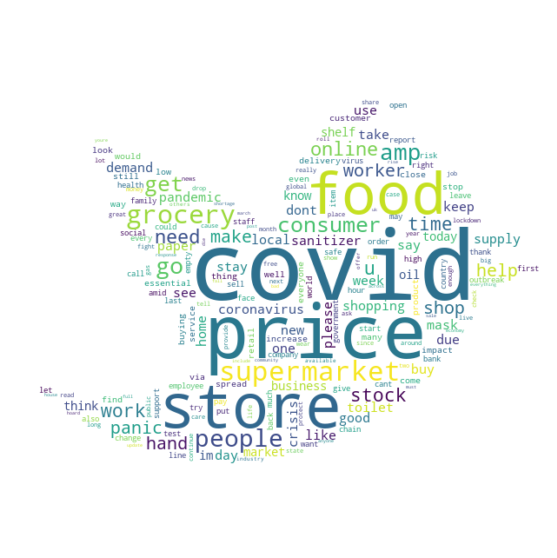

In [25]:
# endereço LOCAL da SUA imagem
from PIL import Image
import numpy as np
twitter_mask = np.array(Image.open("twitter.jpeg"))

from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(
    background_color="white",
    collocations=False,width=3000,
    height=2000,
    max_font_size=200,
    mask=twitter_mask).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Representação TF-IDF com stop words

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer #TFidf

cv_tfidf = TfidfVectorizer(stop_words = stopwords.words('english'))
cv_tfidf.fit(data.ModifyTweet_2)

text_vect = cv_tfidf.transform(data.ModifyTweet_2)

## Data Mining

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(text_vect, 
                                                 data.Sentiment,
                                                 test_size = 0.3, # 30% para teste
                                                 random_state = 42 #inserir aleatoriedade na base de teste e treino
                                                )

## Seed para reprodução de resultados

In [28]:
import numpy as np
import random
seed = 1
random.seed(seed)
np.random.seed(seed)

## Função de avaliação

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

def evaluate(y_test, y_pred):

    print('Model Performance metrics:')
    print('-'*30)
    print('Accuracy:', get_metrics(y_test, y_pred)[0])
    print('Precision:', get_metrics(y_test, y_pred)[1])
    print('Recall:', get_metrics(y_test, y_pred)[2])
    print('F1 Score:', get_metrics(y_test, y_pred)[3])
    
    get_metrics(y_test, y_pred)

    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    # Matriz de confusão
    from sklearn.metrics import confusion_matrix
    confMatrix = confusion_matrix(y_pred, y_test)

    ax = plt.subplot()
    sns.heatmap(confMatrix, annot=True, fmt=".0f")
    plt.xlabel('Real')
    plt.ylabel('Previsto')
    plt.title('Matriz de Confusão')

    # Colocar os nomes
    Labels = ['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive']
    ax.xaxis.set_ticklabels(Labels,rotation=-90) 
    ax.yaxis.set_ticklabels(Labels, rotation=0)
    plt.xticks(rotation = 90)
    plt.show()
    
    from sklearn.metrics import classification_report
    print('\nModel Classification report:')
    print('-'*30)
    print(classification_report(y_test,y_pred))
    
def get_metrics(true_labels, predicted_labels):
    
    accuracy = np.round(metrics.accuracy_score(true_labels, 
                                               predicted_labels),4)
    
    precision = np.round(metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),4)
    
    recall = np.round(metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),4)
    
    f1 = np.round(metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),4)
    
    return [accuracy, precision, recall, f1]

## Machine learning

### Randon Forest

In [30]:
# treinar modelo na base de treino e fazer previsáo na base de teste.
from sklearn.ensemble import RandomForestClassifier #RF é mais rápido, pode qq classificador (reg linear, reg log, svm, etc...) 

clf = RandomForestClassifier(random_state=seed)
clf = clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.5444
Precision: 0.5663
Recall: 0.5444
F1 Score: 0.5377

Prediction Confusion Matrix:
------------------------------


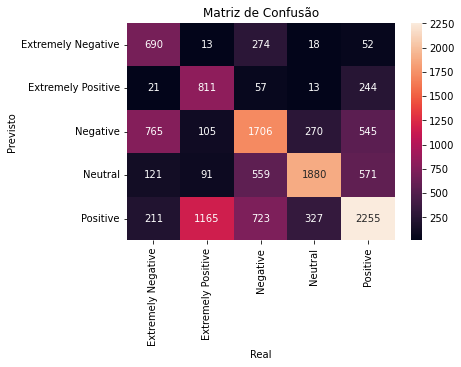


Model Classification report:
------------------------------
                    precision    recall  f1-score   support

Extremely Negative       0.66      0.38      0.48      1808
Extremely Positive       0.71      0.37      0.49      2185
          Negative       0.50      0.51      0.51      3319
           Neutral       0.58      0.75      0.66      2508
          Positive       0.48      0.61      0.54      3667

          accuracy                           0.54     13487
         macro avg       0.59      0.53      0.54     13487
      weighted avg       0.57      0.54      0.54     13487



In [31]:
rf_tfidf_sw = get_metrics(y_test, y_prediction)
evaluate(y_test, y_prediction)

### SVM

In [32]:
# treinar modelo na base de treino e fazer previsáo na base de teste.
from sklearn.svm import SVC

clf = SVC(random_state=seed)
clf = clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.5935
Precision: 0.6265
Recall: 0.5935
F1 Score: 0.5899

Prediction Confusion Matrix:
------------------------------


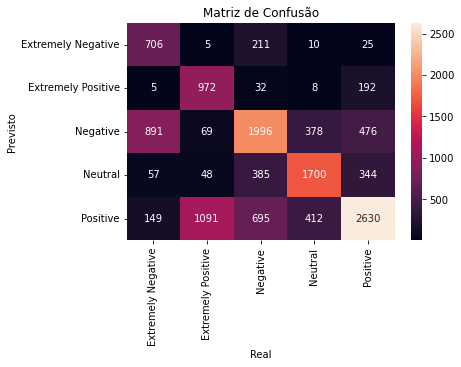


Model Classification report:
------------------------------
                    precision    recall  f1-score   support

Extremely Negative       0.74      0.39      0.51      1808
Extremely Positive       0.80      0.44      0.57      2185
          Negative       0.52      0.60      0.56      3319
           Neutral       0.67      0.68      0.67      2508
          Positive       0.53      0.72      0.61      3667

          accuracy                           0.59     13487
         macro avg       0.65      0.57      0.59     13487
      weighted avg       0.63      0.59      0.59     13487



In [33]:
svm_tfidf_sw = get_metrics(y_test, y_prediction)
evaluate(y_test, y_prediction)

## Representação TF-IDF com stop words e stemming

In [34]:
# criação do corpus com stemming
corpus = []
for doc in data.tokens_stem:
     corpus.append(' '.join(doc))    

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer #TFidf

cv_tfidf = TfidfVectorizer(stop_words = stopwords.words('english'))
cv_tfidf.fit(corpus)

text_vect = cv_tfidf.transform(corpus)

## Data Mining

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(text_vect, 
                                                 data.Sentiment,
                                                 test_size = 0.3, # 30% para teste
                                                 random_state = 42 #inserir aleatoriedade na base de teste e treino
                                                )

## Machine learning

### Randon Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier #RF é mais rápido, pode qq classificador (reg linear, reg log, svm, etc...) 

clf = RandomForestClassifier(random_state=seed)
clf = clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.5453
Precision: 0.5677
Recall: 0.5453
F1 Score: 0.5391

Prediction Confusion Matrix:
------------------------------


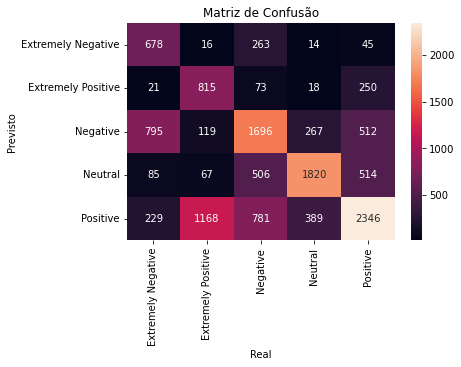


Model Classification report:
------------------------------
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.38      0.48      1808
Extremely Positive       0.69      0.37      0.48      2185
          Negative       0.50      0.51      0.51      3319
           Neutral       0.61      0.73      0.66      2508
          Positive       0.48      0.64      0.55      3667

          accuracy                           0.55     13487
         macro avg       0.59      0.52      0.54     13487
      weighted avg       0.57      0.55      0.54     13487



In [38]:
rf_tfidf_stem = get_metrics(y_test, y_prediction)
evaluate(y_test, y_prediction)

### SVM

In [39]:
# treinar modelo na base de treino e fazer previsáo na base de teste.
from sklearn.svm import SVC

clf = SVC(random_state=seed)
clf = clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.6035
Precision: 0.6323
Recall: 0.6035
F1 Score: 0.6017

Prediction Confusion Matrix:
------------------------------


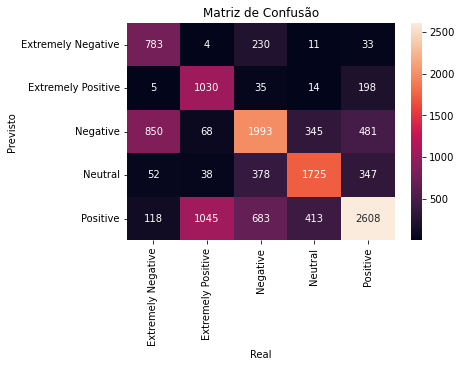


Model Classification report:
------------------------------
                    precision    recall  f1-score   support

Extremely Negative       0.74      0.43      0.55      1808
Extremely Positive       0.80      0.47      0.59      2185
          Negative       0.53      0.60      0.56      3319
           Neutral       0.68      0.69      0.68      2508
          Positive       0.54      0.71      0.61      3667

          accuracy                           0.60     13487
         macro avg       0.66      0.58      0.60     13487
      weighted avg       0.63      0.60      0.60     13487



In [40]:
svm_tfidf_stem = get_metrics(y_test, y_prediction)
evaluate(y_test, y_prediction)

## Representação TF-IDF com stop words e lemetização

In [42]:
# criação do corpus com lemetização 
corpus = []
for doc in data.tokens_lemma:
     corpus.append(' '.join(doc))  

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer #TFidf

cv_tfidf = TfidfVectorizer(stop_words = stopwords.words('english'))
cv_tfidf.fit(corpus)

text_vect = cv_tfidf.transform(corpus)

## Data Mining

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(text_vect, 
                                                 data.Sentiment,
                                                 test_size = 0.3, # 30% para teste
                                                 random_state = 42 #inserir aleatoriedade na base de teste e treino
                                                )

## Machine learning

### Randon Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier #RF é mais rápido, pode qq classificador (reg linear, reg log, svm, etc...) 

clf = RandomForestClassifier(random_state=seed)
clf = clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.5411
Precision: 0.5639
Recall: 0.5411
F1 Score: 0.5348

Prediction Confusion Matrix:
------------------------------


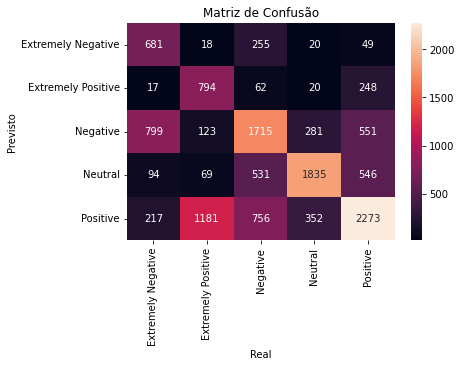


Model Classification report:
------------------------------
                    precision    recall  f1-score   support

Extremely Negative       0.67      0.38      0.48      1808
Extremely Positive       0.70      0.36      0.48      2185
          Negative       0.49      0.52      0.51      3319
           Neutral       0.60      0.73      0.66      2508
          Positive       0.48      0.62      0.54      3667

          accuracy                           0.54     13487
         macro avg       0.59      0.52      0.53     13487
      weighted avg       0.56      0.54      0.53     13487



In [46]:
rf_tfidf_leme = get_metrics(y_test, y_prediction)
evaluate(y_test, y_prediction)

### SVM

In [47]:
# treinar modelo na base de treino e fazer previsáo na base de teste.
from sklearn.svm import SVC

clf = SVC(random_state=seed)
clf = clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

In [48]:
get_metrics(y_test, y_prediction)

[0.5932, 0.6218, 0.5932, 0.5913]

Model Performance metrics:
------------------------------
Accuracy: 0.5932
Precision: 0.6218
Recall: 0.5932
F1 Score: 0.5913

Prediction Confusion Matrix:
------------------------------


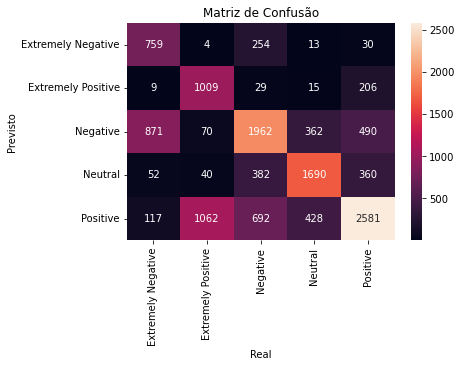


Model Classification report:
------------------------------
                    precision    recall  f1-score   support

Extremely Negative       0.72      0.42      0.53      1808
Extremely Positive       0.80      0.46      0.58      2185
          Negative       0.52      0.59      0.55      3319
           Neutral       0.67      0.67      0.67      2508
          Positive       0.53      0.70      0.60      3667

          accuracy                           0.59     13487
         macro avg       0.65      0.57      0.59     13487
      weighted avg       0.62      0.59      0.59     13487



In [49]:
svm_tfidf_leme = get_metrics(y_test, y_prediction)
evaluate(y_test, y_prediction)

In [50]:
# Compile todas as métricas de erro em um quadro de dados para comparação
results = pd.DataFrame(list(zip(rf_tfidf_sw, svm_tfidf_sw, rf_tfidf_stem, svm_tfidf_stem, rf_tfidf_leme, svm_tfidf_leme)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['RF_SW', 'SVM_SW','RF_STEM', 'SVM_STEM', 'RF_LEME', 'SVM_LEME']
results

,RF_SW,SVM_SW,RF_STEM,SVM_STEM,RF_LEME,SVM_LEME
Accuracy,0.5444,0.5935,0.5453,0.6035,0.5411,0.5932
Precision,0.5663,0.6265,0.5677,0.6323,0.5639,0.6218
Recall,0.5444,0.5935,0.5453,0.6035,0.5411,0.5932
F1 Score,0.5377,0.5899,0.5391,0.6017,0.5348,0.5913


## Representação bag of words com stop words

In [57]:
from sklearn.feature_extraction.text import CountVectorizer #bag of words
          
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(data.ModifyTweet_2)

text_vect = cv.transform(data.ModifyTweet_2)

## Data Mining

In [58]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(text_vect, 
                                                 data.Sentiment,
                                                 test_size = 0.3, # 30% para teste
                                                 random_state = 42 #inserir aleatoriedade na base de teste e treino
                                                )

## Machine learning

### Randon Forest

In [59]:
# treinar modelo na base de treino e fazer previsáo na base de teste.
from sklearn.ensemble import RandomForestClassifier #RF é mais rápido, pode qq classificador (reg linear, reg log, svm, etc...) 

clf = RandomForestClassifier(random_state=seed)
clf = clf.fit(X_train, y_train)
y_prediction = clf.predict(X_test)

Model Performance metrics:
------------------------------
Accuracy: 0.5553
Precision: 0.5818
Recall: 0.5553
F1 Score: 0.5409

Prediction Confusion Matrix:
------------------------------


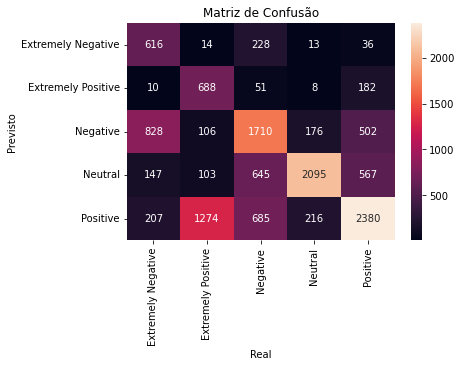


Model Classification report:
------------------------------
                    precision    recall  f1-score   support

Extremely Negative       0.68      0.34      0.45      1808
Extremely Positive       0.73      0.31      0.44      2185
          Negative       0.51      0.52      0.51      3319
           Neutral       0.59      0.84      0.69      2508
          Positive       0.50      0.65      0.56      3667

          accuracy                           0.56     13487
         macro avg       0.60      0.53      0.53     13487
      weighted avg       0.58      0.56      0.54     13487



In [60]:
rf_cv_sw = get_metrics(y_test, y_prediction)
evaluate(y_test, y_prediction)

## Teste

In [51]:
frase = ['covid is bad a desease']

In [52]:
clf.predict(cv_tfidf.transform(frase))

array(['Extremely Negative'], dtype=object)

In [53]:
frase = ['covid is a desease']

In [54]:
clf.predict(cv_tfidf.transform(frase))

array(['Neutral'], dtype=object)

In [55]:
frase = ['covid is a good desease']

In [56]:
clf.predict(cv_tfidf.transform(frase))

array(['Extremely Positive'], dtype=object)